<a href="https://colab.research.google.com/github/Kaushal-Top5699/house_price_prediction_tesnsorflow/blob/main/house_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Prediction.**
In this experiment we will be using House Pricing [DataSet](https://https://www.kaggle.com/datasets/yasserh/housing-prices-dataset), we will apply verious tweaking methods to improve the model's performance.

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
house_prices = files.upload()

Saving Housing.csv to Housing.csv


In [4]:
import io
house_df = pd.read_csv(io.BytesIO(house_prices['Housing.csv']))
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# Creating features df.
X = house_df.drop(['price', 'mainroad', 'guestroom', 
                   'basement', 'hotwaterheating', 'airconditioning', 
                   'prefarea', 'furnishingstatus'], axis = 1)
X.head()

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2


In [6]:
# Creating labels df.
y = house_df['price']
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [30]:
# Splitting data into training and testing.
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = tf.constant(X_tr)
X_test = tf.constant(X_te)
y_train = tf.constant(y_tr)
y_test = tf.constant(y_te)

In [31]:
# Now that we have data ready to use lets build our first model.
# Model 1
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

In [ ]:
# Fitting model_1 for 100 epochs.
history_1 = model_1.fit(X_train, y_train, epochs = 100, verbose = 1)

In [52]:
# Evaluation of model_1
model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 5007508.5000 - mae: 5007508.5000


[5007508.5, 5007508.5]

In [89]:
# Lets improve our model slightly.
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['mae'])

In [ ]:
# Fitting model_2.
history_2 = model_2.fit(X_train, y_train, epochs = 200)

In [83]:
model_2.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 1527694.1250 - mae: 1527694.1250


[1527694.125, 1527694.125]

### By changing the optimizer from SGD() to Adam our model made an improvement of more than 50%.

In [84]:
# Checking for predictions to visualize both models.
model_1_pred = model_1.predict([X_test])
model_2_pred = model_2.predict([X_test])

4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


Text(0.5, 0, 'epochs')

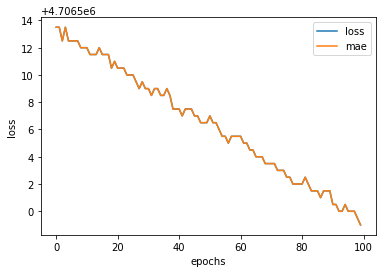

In [85]:
# Visulaizing loss reduction for 100 epochs.
pd.DataFrame(history_1.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

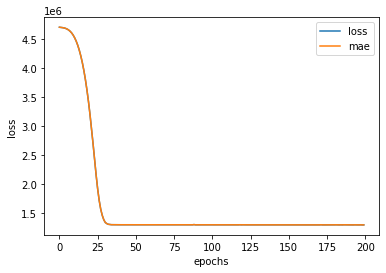

In [86]:
# Visulaizing loss reduction for 200 epochs.
pd.DataFrame(history_2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

As you can after less than half epochs our model perfoms the same or loss stays the same. However, we can try doing different changes like removing one hidden layer.

In [ ]:
# Reducing epochs for model_2 by 50.
history_22 = model_2.fit(X_train, y_train, epochs = 500)

Text(0.5, 0, 'epochs')

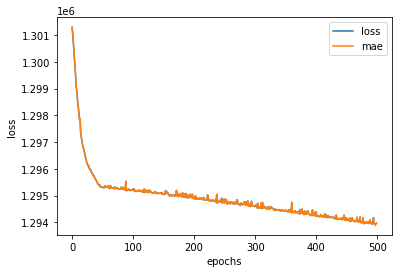

In [95]:
# Now lets visualize again for model_2 for 150 epochs.
pd.DataFrame(history_22.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')